# Basic Tests: Error of the median filter with different window lengths and wave number 5

##2015.10.09 DW

What am I trying to do here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
% matplotlib inline

##Functions

In [3]:
def ErrorPlot(wavenumber, windowLength):
    #add the sine wave and the median filtered wave
    data = np.fromfunction( lambda x: np.sin((x-windowLength / 2)/128 * 2 * np.pi * 5), (128 + windowLength / 2, ) )
    datafiltered = medianFilter(data, windowLength)
    #synchronise both waves and make sure that both arrays have the same length
    data = data[ windowLength / 2 : - windowLength ]
    datafiltered = datafiltered[ : len(data) ]
    error = ErrorRate(data,datafiltered,windowLength)
    plt.axis([0, y + 1, 0, 1])
    plt.xlabel('Window length', fontsize = 20)
    plt.ylabel('Error rate', fontsize = 20)
    plt.scatter(*error)

In [4]:
def ErrorRate(data, datafiltered, windowLength):
    #calculate the difference between the sine wave and the filtered wave
    errorrate = data-datafiltered
    #creating a list and save the error rate (y) and window length (x) in it
    error = []
    errorrate = np.abs(errorrate)
    error.append([windowLength ,np.mean(errorrate)])
    #zip the error list
    error = zip(*error)
    return error

In [5]:
def medianFilter( data, windowLength ): 
    if (windowLength < len(data)and data.ndim == 1):
        #creating an empty liste where the median filtered values will be saved in
        tempret = np.zeros(len(data)-windowLength+1)
        #check if the window length is even to solve the synchronization problem
        if windowLength % 2 == 0:
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength + 1 ] )
            return tempret
        else:
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength ] )
            return tempret
    else:
         raise ValueError("windowLength must be smaller than len(data) and data must be a 1D array")

##Plotting Figures

Hier finde ich was komisch mit parameter XXXp...

C:\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


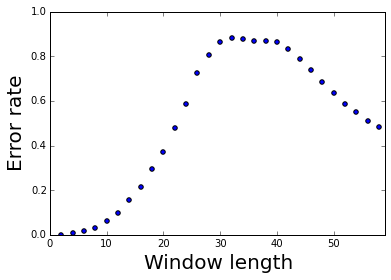

In [6]:
fig = plt.figure()
for y in range (0,60,2):
        ErrorPlot(5,y)

In [14]:
pp = PdfPages( 'Error of the median filtered sine waves with different window lengths.pdf')
pp.savefig(fig)
pp.close()